**Import Dependencies**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal
import scipy.io.wavfile
import scipy.signal
from scipy.signal import butter, iirnotch, lfilter
from sys import breakpointhook
import math

**Reading text File 1 (DataN.txt)**

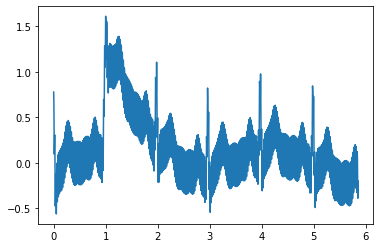

In [ ]:
plotted = []
xaxis = []
myfile = open("/content/DataN.txt", "r")
for k in range(0,65773,1):
  y = k/256  
  s = float(myfile.readline())
  xaxis.append(s)
for k in range(0,1500,1):
  plotted.append(xaxis[k])
y = np.arange(len(plotted))/256    
plt.plot(y, plotted)
plt.show()  

**Filters: Notch Filter and Bandpass** **Filter**

In [ ]:
def notch_filter(cutoff, q):
    nyq = 0.5*256
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a 

def bandpass(lowcut, highcut, order=5):
    nyq = 0.5 * 256
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

**Problem 1**

**Threshold Method**

In [ ]:
def set_threshold(array):
  var_vals = []
  for i in range(0,300):
    var_vals.append(array[i])
  max_val = np.amax(np.array(var_vals))
  sig_pk = 0.13 * max_val
  npk = 0.1*sig_pk
  threshold = 0.25 * sig_pk +0.75 *npk

  return threshold

In [ ]:
# Problem 1 function
def QRS_detect(xaxis,N):

  b_A,a_A = notch_filter(50,30)
  filtered_A = scipy.signal.filtfilt(b_A, a_A, xaxis)
  plotted2_A = []
  for k in range(0,1500,1):
    plotted2_A.append(filtered_A[k])
  y2_A = np.arange(len(plotted2_A))/256 

  bb_A, aa_A = bandpass(0.1, 45, order=5)
  filteredBandPass_A = scipy.signal.filtfilt(bb_A, aa_A, filtered_A)
  plotted3_A = []
  for k in range(0,1500,1):
    plotted3_A.append(filteredBandPass_A[k])
  y3_A = np.arange(len(plotted3_A))/256 


  # filtered 25 before thresholding

  tempband_A = [0] * len(plotted3_A);

  for k in range(2,len(plotted3_A)-2,1):
    tempband_A[k] = (1/8)*(-plotted3_A[k-2]-(2*plotted3_A[k-1])+(2*plotted3_A[k+1])+plotted3_A[k+2])
  plotted4_A = []
  for k in range(0,1500,1):
    plotted4_A.append(tempband_A[k])
  y4_A = np.arange(len(plotted4_A))/256   
    



  temp2_A = [0] * len(plotted3_A)
  for k in range(0,len(plotted3_A),1):
    temp2_A[k] = tempband_A[k]**2
  plotted5_A = []
  for k in range(0,1500,1):
    plotted5_A.append(temp2_A[k])
  y5_A = np.arange(len(plotted5_A))/256   



  N_A = 0
  temp3_A = [0] * len(plotted3_A)
  tempPlotted_A = []
  index_A = []
  for k in range(0,len(temp2_A),1):
    N_A = k
    NN = N
    sum = 0
    while(NN >= 0):
      sum += temp2_A[N_A]
      N_A = N_A-1
      NN = NN -1
    avg = (1/N) * sum  
    temp3_A[k] = avg
  plotted6_A = []    
  for k in range(0,1500,1):
    plotted6_A.append(temp3_A[k])

  y6_A = np.arange(len(plotted6_A))/256  

  #thresholding
  threshold = set_threshold(plotted6_A)     

  for k in range(1, len(plotted6_A),1):
    if(k < len(plotted6_A)-32):
      if(plotted6_A[k] >threshold and plotted6_A[k-1] < threshold and plotted6_A[k-2] < threshold and plotted6_A[k-3] < threshold):
        arr = []
        for j in range(k, k+32):
          arr.append(plotted6_A[j]) 
        val_A = np.amax(np.array(arr))
        for i in range(0, len(y6_A)):
          if (plotted6_A[i]==val_A):
            index_A.append(y6_A[i])
            tempPlotted_A.append(val_A)   
  temp4_A = [0] * len(plotted6_A)
  plotted7_A =plotted6_A
  for i in range(0,len(plotted6_A)):
    if (plotted6_A[i]<threshold):
      plotted7_A[i] =0



  ##### For the RR interval and timestamps########


  #Notch filter
  b,a = notch_filter(50,30)
  filtered = scipy.signal.filtfilt(b, a, xaxis)
  plotted2 = []
  for k in range(0,1500,1):
    plotted2.append(filtered[k])
  y2 = np.arange(len(plotted2))/256 


  #Bandpass filter
  bb, aa = bandpass(0.1, 45, order=5)
  filteredBandPass = scipy.signal.filtfilt(bb, aa, filtered)
  plotted3 = []
  for k in range(0,1500,1):
    plotted3.append(filteredBandPass[k])
  y3 = np.arange(len(plotted3))/256 
  


  #Differentiation
  tempband = [0] * len(filteredBandPass);
  for k in range(2,len(filteredBandPass)-2,1):
    tempband[k] = (1/8)*(-filteredBandPass[k-2]-(2*filteredBandPass[k-1])+(2*filteredBandPass[k+1])+filteredBandPass[k+2])
  plotted4 = []
  for k in range(0,1500,1):
    plotted4.append(tempband[k])
  y4 = np.arange(len(plotted4))/256   
  # plt.plot(y4, plotted4) 


  #Squaring
  temp2 = [0] * len(filteredBandPass)
  for k in range(0,len(filteredBandPass),1):
    temp2[k] = tempband[k]**2
  plotted5 = []
  for k in range(0,1500,1):
    plotted5.append(temp2[k])
  y5 = np.arange(len(plotted5))/256   
  


  #Moving average with size N
  temp3 = [0] * len(filteredBandPass)
  tempPlotted = []
  index = []
  for k in range(0,len(temp2),1):
    N1 = k
    NN = N
    sum = 0
    while(NN >= 0):
      sum += temp2[N1]
      N1 = N1-1
      NN = NN -1
    avg = (1/N) * sum  
    temp3[k] = avg
  plotted6 = []    
  for k in range(0,1500,1):
    plotted6.append(temp3[k])
  y6 = np.arange(len(plotted6))/256                
  



  #Thresholding
  
  threshold = set_threshold(plotted6)
  temp4 = [0] * len(temp3)
  count = 0
  max = 0
  flagindex = False
  for k in range(1,len(temp3),1):
    if(temp3[k] > 0.004):
      count = count + 1
      temp4[k] = temp3[k]
      
  plotted7 = []
  for k in range(0,1500,1):
    plotted7.append(temp4[k])

  y7 = np.arange(len(plotted7))/256      
 

  for k in range(1, len(plotted7),1):
    if(k < len(plotted7)-1):
      if(plotted7[k] >0 and plotted7[k+1] >0):
        if(max < plotted7[k]):
          max = plotted7[k]
      else:
        if(plotted7[k] > 0):
          if(plotted7[k] > max):
            max = plotted7[k]
            tempPlotted.append(max);
            flagindex = True
            i = y7[k]
            max = 0 
          else:
            tempPlotted.append(max);
            i = y7[k]
            flagindex = True
            max = 0 
    if(flagindex == True):         
      index.append(i)
      flagindex = False
   



  # Obtaining RR intervals and timestamps
  temp5 = []
  c2 = 1
  c = 0
  RR = []
  beat_number = []
  timestamp =[]
  count2 = 0
  max = 0

  for k in range(1, len(temp4),1):
    if(k < len(temp4)-1):
      if(temp4[k] >0 and temp4[k+1] >0):
        if(max < temp4[k]):
          max = temp4[k]
      else:
        if(temp4[k] > 0):
          if(temp4[k] > max):
            max = temp4[k]
            temp5.append(max)
            timestamp.append(k)
            max = 0 
          else:
            temp5.append(max)
            timestamp.append(k)
            max = 0                  
  flag = False
  for i in range(0,len(temp5)-1,1):          
    for k in range(0,len(temp4),1):
      if(temp4[k] == temp5[i] ):
        for j in range(k+1,len(temp4),1):
          if(temp4[j] == temp5[i+1]):
            beat_number.append(c2+1)
            RR.append(c)
            c = 0
            c2 = c2 + 1
            flag = True
            break
          else:
            c = c + 1
      if(flag == True):
        flag = False
        break     

 
  RR1 = np.array(RR)
  max_interval = np.amax(RR)
  

  RR1 = RR1/256 * 1000
# For saving the images for each case
  # if(N ==10):
  #   plt.xlabel('Time')
  #   plt.ylabel('Amplitude')
  #   plt.title('DetectedR_10')
  #   plt.plot(y7, plotted7)
  #   plt.scatter(index_A, tempPlotted_A, s=150,c = [1,0,0], marker='*')
  #   plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/DetectedR_10.jpg')
  # elif (N==15):
  #   plt.xlabel('Time')
  #   plt.ylabel('Amplitude')
  #   plt.title('DetectedR_15')
  #   plt.plot(y7, plotted7)
  #   plt.scatter(index_A, tempPlotted_A, s=150,c = [1,0,0], marker='*')
  #   plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/DetectedR_15.jpg')
  # else:
  #   plt.xlabel('Time')
  #   plt.ylabel('Amplitude')
  #   plt.title('DetectedR_25')
  #   plt.plot(y7, plotted7)
  #   plt.scatter(index_A, tempPlotted_A, s=150,c = [1,0,0], marker='*')
  #   plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/DetectedR_25.jpg')

  plt.subplot(1, 3, 1)
  plt.title('Marked Peaks N= %d'%N)
  plt.xlabel('Time')
  plt.ylabel('Amplitudes')
  plt.plot(y7, plotted7_A)
  plt.scatter(index_A, tempPlotted_A, s=150,c = [1,0,0], marker='*')

  #plot 2
  plt.subplot(1, 3, 3)
  plt.title('RR Intervals N= %d'%N)
  plt.xlabel('Beat Number')
  plt.ylabel('RR-intervals (msec)')
  plt.plot(beat_number,RR1)
  
  return RR, timestamp






*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


265 245


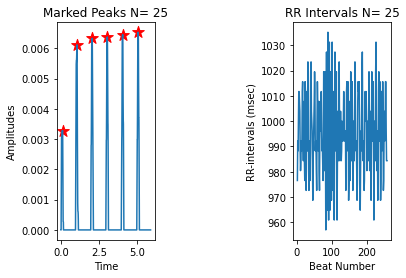

In [ ]:
RR, times = QRS_detect(xaxis,25)
max_interval = np.amax(RR)
min_interval = np.amin(RR)
print(max_interval, min_interval)


**Problem 1 continued**
---
**Before Thresholding filtered output**





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.00025828245993872673
[0.0005297127062936714, 0.0008004734373253911, 0.001099709290871115, 0.0016163928490998125, 0.0023117413532888756, 0.002841553959543038, 0.003035798365720715, 0.0030657518437692257, 0.0030707741412217765, 0.003077290958794445, 0.0030787603757255967, 0.0030908590418566207, 0.0031538319170055645, 0.003218567049584272, 0.003238123724816737, 0.003239463968364401, 0.0032438509043406496, 0.003262835748627266, 0.003277072568587125, 0.0032738114856233212, 0.0032702216890229162, 0.0032654463819881737, 0.0032711727896356465, 0.0032797478616320825, 0.0032803578437399813, 0.003281713300280314, 0.0028042453296894688, 0.0025332614399664294, 0.0022385857838580236, 0.0017198758491212569, 0.001022002921594376, 0.0004900133564337147]
[0.0005065598226292235, 0.0009299797567725457, 0.0014615730511170653, 0.002055322557165858, 0.0026724625515141772, 0.0032815805891106783, 0.003852829983369627, 0.004357603558373384, 0.004774697364206805, 0.005095736376919787, 0.005324550241227195, 0.0

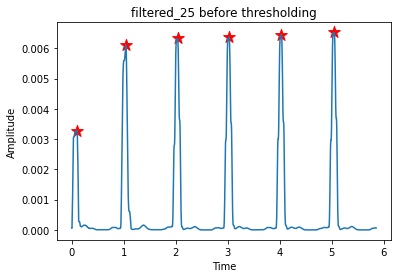

In [ ]:
def QRS_detect_before_threshold(xaxis,N):
  b,a = notch_filter(50,30)
  filtered = scipy.signal.filtfilt(b, a, xaxis)
  plotted2 = []
  for k in range(0,1500,1):
    plotted2.append(filtered[k])
  y2 = np.arange(len(plotted2))/256 

  bb, aa = bandpass(0.1, 45, order=5)
  filteredBandPass = scipy.signal.filtfilt(bb, aa, filtered)
  plotted3 = []
  for k in range(0,1500,1):
    plotted3.append(filteredBandPass[k])
  y3 = np.arange(len(plotted3))/256 


  tempband = [0] * len(plotted3);

  for k in range(2,len(plotted3)-2,1):
    tempband[k] = (1/8)*(-plotted3[k-2]-(2*plotted3[k-1])+(2*plotted3[k+1])+plotted3[k+2])
  plotted4 = []
  for k in range(0,1500,1):
    plotted4.append(tempband[k])
  y4 = np.arange(len(plotted4))/256   
    



  temp2 = [0] * len(plotted)
  for k in range(0,len(plotted),1):
    temp2[k] = tempband[k]**2
  plotted5 = []
  for k in range(0,1500,1):
    plotted5.append(temp2[k])
  y5 = np.arange(len(plotted5))/256   



  temp3 = [0] * len(plotted)
  tempPlotted = []
  index = []
  for k in range(0,len(temp2),1):
    N1 = k
    NN = N # N =10, 15 or 25
    sum = 0
    while(NN >= 0):
      sum += temp2[N1]
      N1 = N1-1
      NN = NN -1
    avg = (1/N) * sum # 1/10, 1/15 or 1/25  
    temp3[k] = avg
  plotted6 = []    
  for k in range(0,1500,1):
    plotted6.append(temp3[k])

  y6 = np.arange(len(plotted6))/256  

 
  threshold = set_threshold(plotted6)  
  print(threshold)    

  for k in range(1, len(plotted6),1):
    if(k < len(plotted6)-32):
      if(plotted6[k] >threshold and plotted6[k-1] < threshold and plotted6[k-2] < threshold and plotted6[k-3] < threshold):
        arr = []
        for j in range(k, k+32):
          arr.append(plotted6[j])
        print(arr)  
        val = np.amax(np.array(arr))
        for i in range(0, len(y6)):
          if (plotted6[i]==val):
            index.append(y6[i])
            tempPlotted.append(val)   
  # plt.plot(y6, plotted6)
  # plt.xlabel('Time')
  # plt.ylabel('Amplitude')
  # plt.title('filtered_25 before thresholding')
  # plt.scatter(index, tempPlotted, s=150,c = [1,0,0], marker='*')
  if (N==10):
    plt.plot(y6, plotted6)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('filtered_10 before thresholding')
    plt.scatter(index, tempPlotted, s=150,c = [1,0,0], marker='*')
    plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/filtered_10b.jpg')
  elif(N==15):
    plt.plot(y6, plotted6)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('filtered_15 before thresholding')
    plt.scatter(index, tempPlotted, s=150,c = [1,0,0], marker='*')
    plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/filtered_15b.jpg')
  else: 
    plt.plot(y6, plotted6)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('filtered_25 before thresholding')
    plt.scatter(index, tempPlotted, s=150,c = [1,0,0], marker='*')
    plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/filtered_25b.jpg')

  plt.show()
  return index, tempPlotted, y6, plotted6


ind, t,y,p=QRS_detect_before_threshold(xaxis,25)




---


**Unfiltered_25**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[0.011465752511664467, 0.011449602602161442, 0.012542475163592685, 0.01263867479507706, 0.01214347010333706, 0.011281379962471054, 0.013181856090015534, 0.014650633990384907, 0.014506470602134383, 0.014586302181168125, 0.013800076192105624, 0.014137999302778124, 0.014145470433368126, 0.013635048333680627, 0.014608218500056249, 0.014464289959696251, 0.01449244513169625, 0.014443265135236251, 0.013726155137504376, 0.0145057832389475, 0.014385719427799376, 0.014348219338519375, 0.014621773500081876, 0.013851460504405002, 0.014427244524655, 0.015233405554005625, 0.015249186707508125, 0.016161121010570625, 0.014467821839098123, 0.01463797102674875, 0.01552117624507625, 0.015425298171048747, 0.014351099713736248, 0.012424232478186874, 0.012556945855564373, 0.013158448302257498, 0.013007264013579998, 0.013360639655908122, 0.013026101132470625, 0.013206145319658748, 0.013154867617283121, 0.012496491465083122, 0.012984787269305622, 0.012857380931718747, 0.012931223265950623, 0.01320859319100749

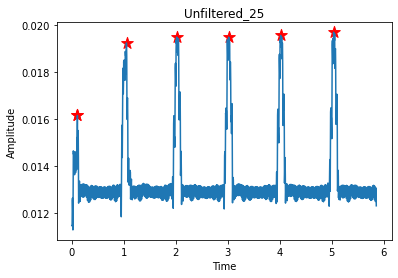

In [ ]:
# Unfiltered 25 before thresholding

def QRS_Unfiltered(xaxis, N):  
    

  tempband = [0] * len(plotted);

  for k in range(2,len(plotted)-2,1):
    tempband[k] = (1/8)*(-plotted[k-2]-(2*plotted[k-1])+(2*plotted[k+1])+plotted[k+2])
  plotted4 = []
  for k in range(0,1500,1):
    plotted4.append(tempband[k])
  y4 = np.arange(len(plotted4))/256   
    
  temp2 = [0] * len(plotted)
  for k in range(0,len(plotted),1):
    temp2[k] = tempband[k]**2
  plotted5 = []
  for k in range(0,1500,1):
    plotted5.append(temp2[k])
  y5 = np.arange(len(plotted5))/256   



  temp3 = [0] * len(plotted)
  tempPlotted = []
  index = []
  for k in range(0,len(temp2),1):
    N1 = k
    NN = N
    sum = 0
    while(NN >= 0):
      sum += temp2[N1]
      N1 = N1-1
      NN = NN -1
    avg = (1/N) * sum  
    temp3[k] = avg
  plotted6 = []    
  for k in range(0,1500,1):
    plotted6.append(temp3[k])
  print(plotted6)
  y6 = np.arange(len(plotted6))/256 
 
  threshold = set_threshold(plotted6)*18               
  for k in range(1, len(plotted6),1):
    if(k < len(plotted6)-32):
      if(plotted6[k] >threshold and plotted6[k-1] < threshold and plotted6[k-2] < threshold and plotted6[k-3] < threshold):
        arr = []
        for j in range(k, k+32):
          arr.append(plotted6[j])
        print(arr)  
        val = np.amax(np.array(arr))
        for i in range(0, len(y6)):
          if (plotted6[i]==val):
            index.append(y6[i])
            tempPlotted.append(val)   
  plt.plot(y6, plotted6)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.title('Unfiltered_25')
  plt.scatter(index, tempPlotted, s=150,c = [1,0,0], marker='*')
  # plt.savefig('/content/gdrive/MyDrive/Semester 10/Biomedical/Biomedical Assignment 1/Unfiltered_25.jpg')
  plt.show()
  
  return index, tempPlotted, y6, plotted6


 
i1,t1,y1,p1 = QRS_Unfiltered(xaxis,25)



**Problem 1:**
---

**The optimal setting of N is 25 as N should be set approximately the same as the widest possible QRS Complex just to make sure that all of them are captured and mainatining how they (QRS) look like**






---



---
**Problem 2**


**Reading 2nd text file: Data2.txt**

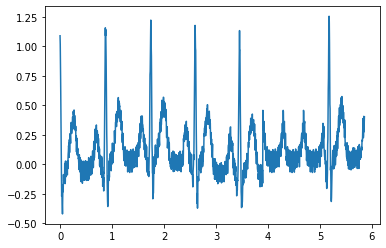

In [ ]:
plotted_p2 = []
xaxis_p2 = []
myfile_p2 = open("/content/Data2.txt", "r")
for k in range(0,65586,1):
  s = float(myfile_p2.readline())
  xaxis_p2.append(s)
for k in range(0,1500,1):
  plotted_p2.append(xaxis_p2[k])
y_p2 = np.arange(len(plotted_p2))/256    
plt.plot(y_p2, plotted_p2)
plt.show()
def notch_filter(cutoff, q):
    nyq = 0.5*256
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a 

def bandpass(lowcut, highcut, order=5):
    nyq = 0.5 * 256
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[1135, 2442, 5298]


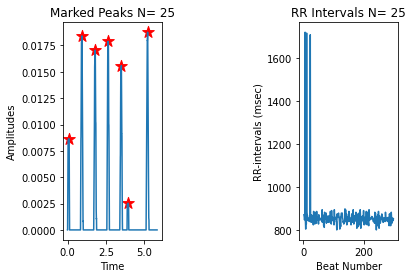

In [ ]:
# Problem 2
def missing_beats_detect(xaxis,N):
  RR, times = QRS_detect(xaxis,N)
  max_interval = np.amax(RR)
  min_interval = np.amin(RR)
  average_timebeat =0
  sum = 0
  for i in range(0,len(RR)):
    sum+=RR[i]
  average_timebeat=int(sum/len(RR))

  average_timebeat = float(int(average_timebeat))
  minbound=average_timebeat-10
  maxbound=average_timebeat+10
  missing_beats = []

  for k in range(0,len(times)-1):
    if ((times[k+1]-times[k])>= minbound and  (times[k+1]-times[k])<= maxbound):
      continue
    else:
      beat = (times[k+1]+times[k])/2
      missing_beats.append(int(beat))
  print(missing_beats)
  return missing_beats


timestamps_miss = missing_beats_detect(xaxis_p2,25)
